上一篇笔记通过matplotlib库（具体只用到了matplotlib.pyplot）实现了对数据的可视化，通过直方图、条形图、散点图、箱线图等可以让我们从更宏观更整体的角度看待数据。回顾这类图的绘制代码，请戳[chpSixChartsPlot](./chpSixChartsPlot.ipynb)。这一篇我们讲其他的可视化库。


### 目录
- pandas画图
- ggplot
- seaborn

## pandas画图
pandas除了有很好的数据容器和数据处理函数之外，也能够用来进行可视化。pandas 通过提供一个可以作用于序列和数据框的函数 plot，简化了基于序列和数据框中的数据创建图表的过程。plot 函数默认创建折线图，你还可以通过设置参数 kind 创建其他类型的图表。
例如，除了使用 matplotlib 创建标准统计图，还可以使用 pandas 创建其他类型的统计图，比如六边箱图（hexagonal bin plot） 、矩阵散点图、密度图、Andrews 曲线图、平行坐标图、延迟图、自相关图和自助抽样图。如果要向统计图中添加第二 y 轴、误差棒和数据表，使用 pandas 可以很直接地实现。

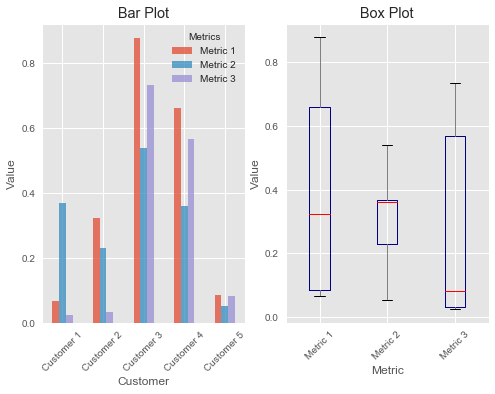

In [7]:
def pandasPlots():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax1, ax2 = axes.ravel()

    data_frame = pd.DataFrame(np.random.rand(5, 3),
                            index=['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5'],
                            columns=pd.Index(['Metric 1', 'Metric 2', 'Metric 3'], name='Metrics'))
    #创建条形图
    data_frame.plot(kind='bar', ax=ax1, alpha=0.75, title='Bar Plot') #pandas的plot
    plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=10)
    plt.setp(ax1.get_yticklabels(), rotation=0, fontsize=10)
    ax1.set_xlabel('Customer')
    ax1.set_ylabel('Value')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    colors = dict(boxes='DarkBlue', whiskers='Gray', medians='Red', caps='Black') #创建一个颜色字典
    data_frame.plot(kind='box', color=colors, sym='r.', ax=ax2, title='Box Plot') #创建箱线图，并将它与条形图并排放置
    plt.setp(ax2.get_xticklabels(), rotation=45, fontsize=10)
    plt.setp(ax2.get_yticklabels(), rotation=0, fontsize=10)
    ax2.set_xlabel('Metric')
    ax2.set_ylabel('Value')
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    
    plt.show()
    
pandasPlots()

### ggplot
ggplot 基于 R 语言的 ggplot2 包和图形语法，R 的 ggplot2 包在编程可视化领域可是鼎鼎大名的。ggplot 与其他绘图包的关键区别是它的语法将数据与实际绘图明确地分离开来。为了对数据进行可视化表示，ggplot 提供了几种基本元素：几何对象、图形属性和标度。除此之外，为了进行更高级的绘图，ggplot 还提供一些附加元素：统计变换、坐标系、子窗口和可视化主题。下面的例子用的是ggplot 包的内置数据集。

In [4]:
from ggplot import *
def ggplotPlot1():
    print(mtcars.head())
    plt1 = ggplot(aes(x='mpg'), data=mtcars) +\
            geom_histogram(fill='darkblue', binwidth=2) +\
            xlim(10, 35) + ylim(0, 10) +\
            xlab("MPG") + ylab("Frequency") +\
            ggtitle("Histogram of MPG") +\
            theme_matplotlib()
    print(plt1)
    
def ggplotPlot2():
    print(meat.head())
    plt2 = ggplot(aes(x='date', y='beef'), data=meat) +\
            geom_line(color='purple', size=1.5, alpha=0.75) +\
            stat_smooth(colour='blue', size=2.0, span=0.15) +\
            xlab("Year") + ylab("Head of Cattle Slaughtered") +\
            ggtitle("Beef Consumption Over Time") +\
            theme_seaborn()
    print(plt2)
    
def ggplotPlot3():
    print(diamonds.head())
    plt3 = ggplot(diamonds, aes(x='carat', y='price', colour='cut')) +\
            geom_point(alpha=0.5) +\
            scale_color_gradient(low='#05D9F6', high='#5011D1') +\
            xlim(0, 6) + ylim(0, 20000) +\
            xlab("Carat") + ylab("Price") +\
            ggtitle("Diamond Price by Carat and Cut") +\
            theme_gray()
    print(plt3)

    #ggsave(plt3, "ggplot_plots.png") #保存图片

ggplotPlot1() #调用

## seaborn

seaborn 简化了在 Python 中创建信息丰富的统计图表的过程。它是在 matplotlib 基础上开发的，Python中还有一些可视化包也是基于matplotlib开发的，所以我们前面先讲了matplotlib并且讲了有一篇笔记的长度。seaborn支持 numpy 和 pandas 中的数据结构，并集成了 scipy 和 statsmodels 中的统计程序。seaborn 可以创建标准统计图，包括直方图、密度图、条形图、箱线图和散点图。它可以对成对变量之间的相关性、线性与非线性回归模型以及统计估计的不确定性进行可视化。它可以用来在评估变量时检查变量之间的关系，并可以建立统计图矩阵来显示复杂的关系。它有内置的主题和调色板，可以用来制作精美的图表。最后，因为它是建立在matplotlib 上的，所以你可以使用 matplotlib 的命令来对图形进行更深入的定制。

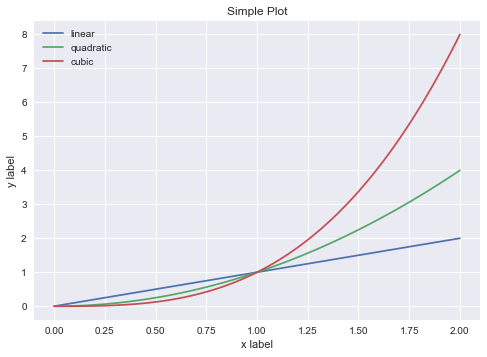

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def seabornPlots1():
    sns.set(color_codes=True)

    x = np.linspace(0, 2, 100)
    plt.plot(x, x, label='linear')
    plt.plot(x, x**2, label='quadratic')
    plt.plot(x, x**3, label='cubic')
    plt.xlabel('x label')
    plt.ylabel('y label')
    plt.title("Simple Plot")
    plt.legend(loc="best")
    plt.show()

def seabornPlots2():# 直方图 
    x = np.random.normal(size=1000)
    sns.distplot(x, bins=20, kde=True, rug=False, label="Histogram w/o Density")
    #sns.axlabel("Value", "Frequency")
    plt.title("Histogram of a Random Sample from a Normal Distribution")
    plt.legend()
    plt.show()
    
seabornPlots1() #调用

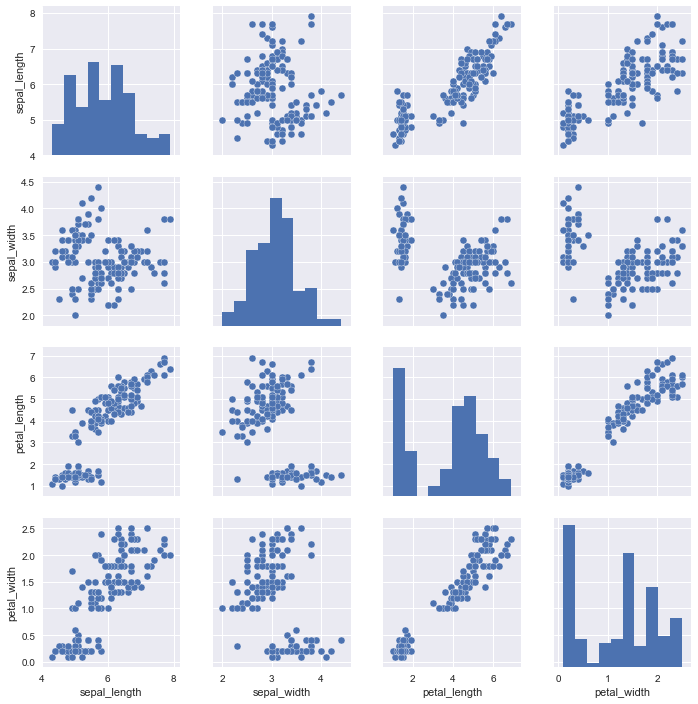

In [6]:
#前面已经import 在jupyter里不需要再import
def seabornPlots3():# 散点图
    mean, cov = [5, 10], [(1, .5), (.5, 1)]
    data = np.random.multivariate_normal(mean, cov, 200)
    data_frame = pd.DataFrame(data, columns=["x", "y"])
    sns.jointplot(x="x", y="y", data=data_frame, kind="reg").set_axis_labels("x", "y")
    plt.suptitle("Joint Plot of Two Variables with Bivariate and Univariate Graphs")
    plt.show()

def seabornPlots4():#双变量
    iris = sns.load_dataset("iris") #用内置的鸢尾花数据集
    sns.pairplot(iris)
    plt.show()
    
seabornPlots4()

通过上面的代码可以看到，这些可视化效果比matplotlib库简化了很多。它们只是 seaborn 强大功能的冰山一角。你可以参考 [seaborn 文档](http://stanford.edu/~mwaskom/software/seaborn/index.html)，了解创建和设置统计图表的更多信息。

可视化部分先讲到这里，关于可视化还有很多内容，例如更多类型的图表，更多图表细节的设置，结合前端图表库进行可视化，还有地理数据可视化，之后有机会就在这系列笔记里补充更多可视化的内容。下一篇笔记是到了《Python数据分析基础》的**第7章 描述性统计与建模**，会通过具体的数据集实践一些统计学量的计算会用到一定的算法。